In [126]:
%pip install random
%pip install numpy
%pip install matplotlib

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [127]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [128]:
def plot(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y) 
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatterplot of X vs Y")
    plt.grid(True)
    plt.show()
def plot_comparison(values1, values2):
    plt.figure(figsize=(8, 6))
    plt.scatter(values1[0], values1[1], color='red', label='Actual Values') 
    plt.scatter(values2[0], values2[1], color='blue', label='Predicted Values') 
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatterplot Comparison")
    plt.grid(True)
    plt.legend()
    plt.show()

In [129]:
def generate_polynomial_dataset(degree, n_samples):
    X = np.random.uniform(-5, 5, n_samples).reshape(-1, 1)
    y = []
    for xi in X:
        sum = 0
        for ki in range(degree + 1):
            ak = np.random.uniform(0, 1)
            term = ak * (xi ** ki)
            sum += term
        e = np.random.normal(0, 1)
        yi = sum + e
        y.append(yi)
    return X, y

In [130]:
class RidgeRegression_ClosedForm():
    def __init__(self, alpha = 0.5):
        self.alpha = alpha
        self.weights = None

    def train(self, X, y):
        X = np.insert(X, X.shape[1], 1, axis=1)
        biased_i = np.identity(len(X[0]))
        biased_i[0,0] = 0
        XT = np.transpose(X)
        self.weights = np.linalg.inv((XT @ X) + self.alpha * biased_i) @ XT @ y
        print(self.weights)

    def predict(self, X):
        X = np.insert(X, X.shape[1], 1, axis=1)
        return X @ self.weights

In [131]:
X_linear, y_linear = generate_polynomial_dataset(1, 1000)
X_quad, y_quad = generate_polynomial_dataset(2, 1000)
X_cubic, y_cubic = generate_polynomial_dataset(3, 1000)

X_quad = np.hstack((X_quad, X_quad**2))
X_cubic = np.hstack((X_cubic, X_cubic**2, X_cubic**3))
X_cubic = StandardScaler().fit_transform(X_cubic)

X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear, y_linear, test_size=0.2)
X_quad_train, X_quad_test, y_quad_train, y_quad_test = train_test_split(X_quad, y_quad, test_size=0.2)

X_cubic_train, X_cubic_test, y_cubic_train, y_cubic_test = train_test_split(X_cubic, y_cubic, test_size=0.2)

[[0.47742678]
 [0.46656311]]


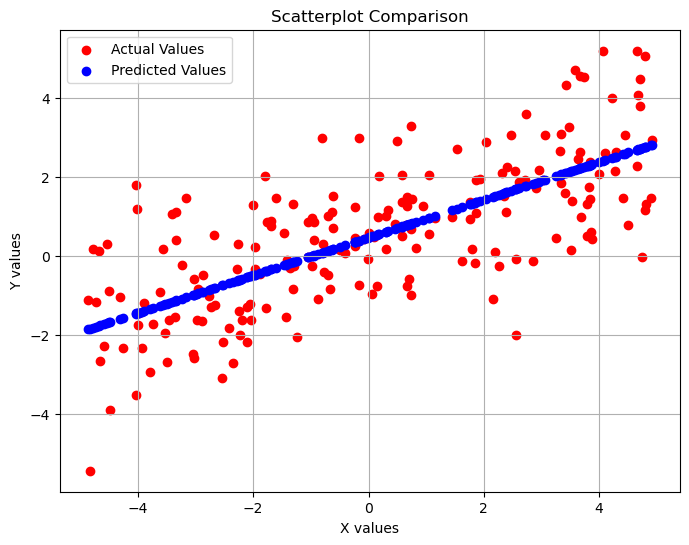

In [132]:
linear_reg_cf = RidgeRegression_ClosedForm()
linear_reg_cf.train(X_linear_train, y_linear_train)
y_linear_predicted = linear_reg_cf.predict(X_linear_test)
plot_comparison([X_linear_test, y_linear_test], [X_linear_test, y_linear_predicted])

[[0.4827422 ]
 [0.51756559]
 [0.44419005]]


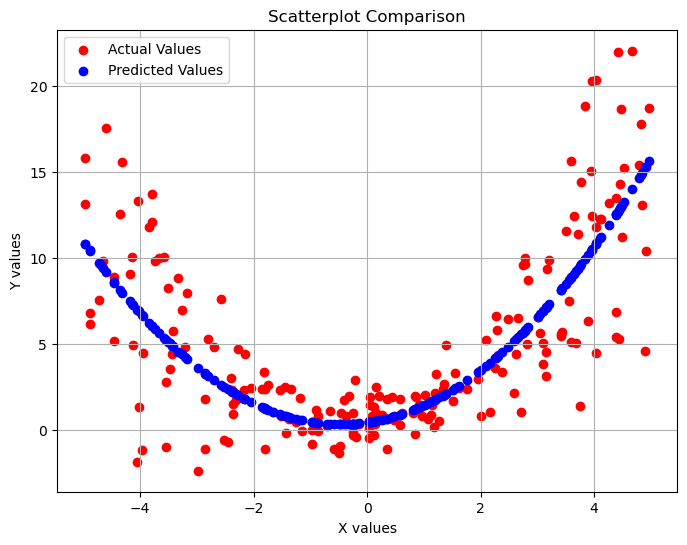

In [133]:
quad_reg_cf = RidgeRegression_ClosedForm()
quad_reg_cf.train(X_quad_train, y_quad_train)
y_quad_predicted = quad_reg_cf.predict(X_quad_test)
plot_comparison([X_quad_test[:,0], y_quad_test], [X_quad_test[:,0], y_quad_predicted])

[[ 0.29808856]
 [ 3.0034935 ]
 [26.13197863]
 [ 2.94280284]]


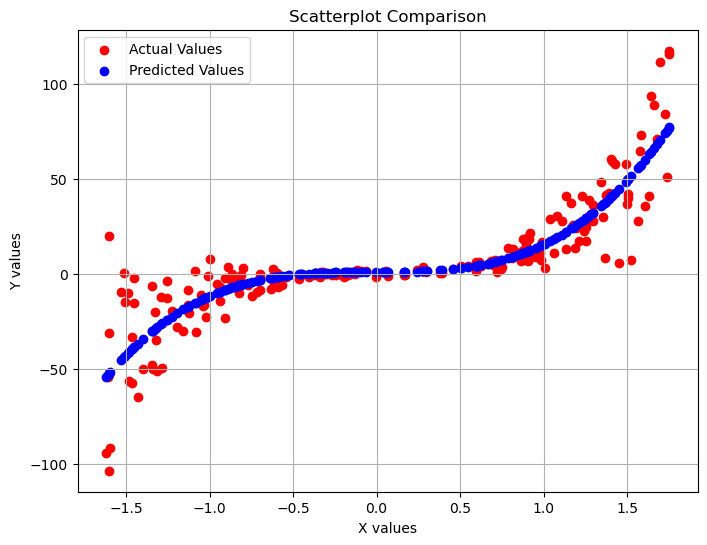

In [134]:
cubic_reg_cf = RidgeRegression_ClosedForm()
cubic_reg_cf.train(X_cubic_train, y_cubic_train)
y_cubic_predicted = cubic_reg_cf.predict(X_cubic_test)
plot_comparison([X_cubic_test[:,0], y_cubic_test], [X_cubic_test[:,0], y_cubic_predicted])

@USING scikit learn ridge regression

In [135]:
def predict_SGDReg(X, Y, X_test, alpha):
    sgd_reg = SGDRegressor(penalty='l2', alpha=alpha, max_iter=1000)
    sgd_reg.fit(X, Y)
    return sgd_reg.predict(X_test)

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


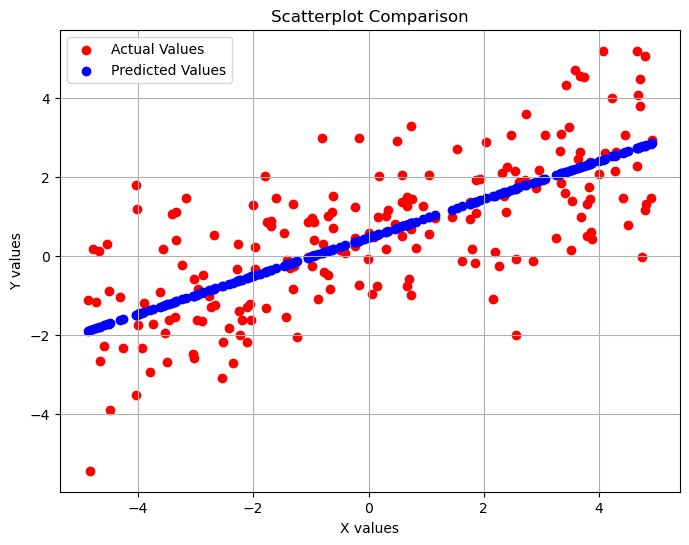

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


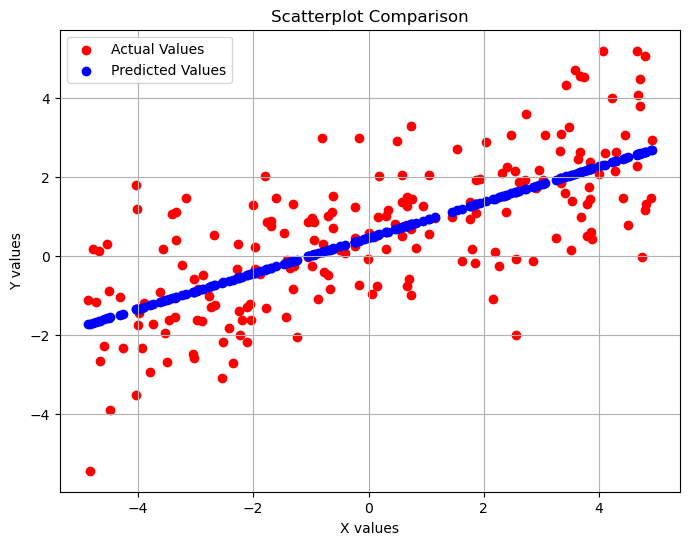

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


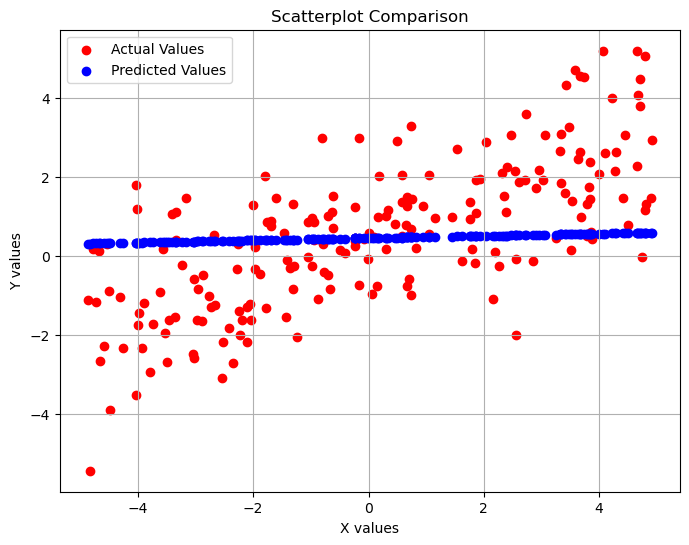

In [136]:
alpha_choices = [0, 0.1, 100]
for alpha in alpha_choices:
    y_linear_predicted = predict_SGDReg(X_linear_train, y_linear_train, X_linear_test, alpha)
    plot_comparison([X_linear_test, y_linear_test], [X_linear_test, y_linear_predicted])

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


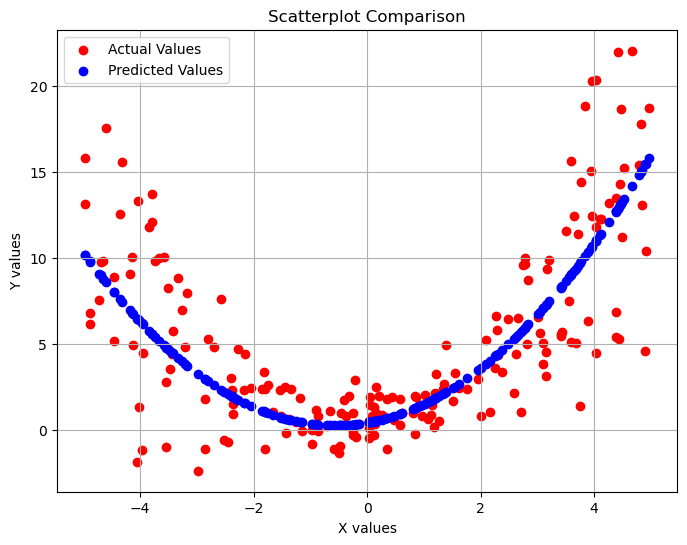

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


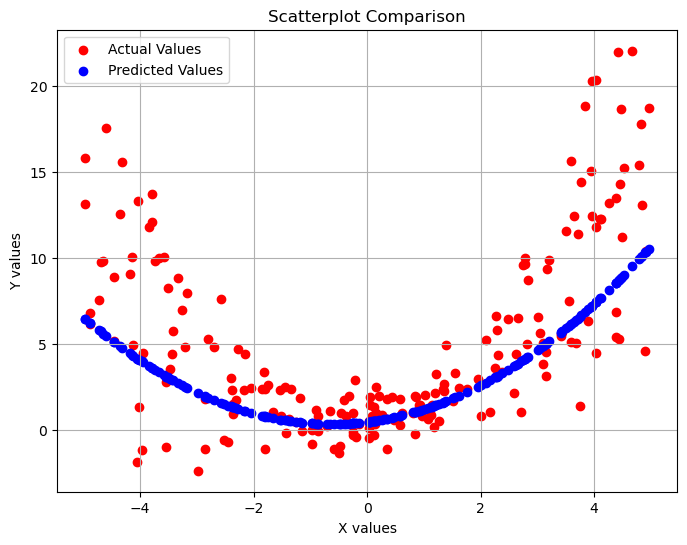

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


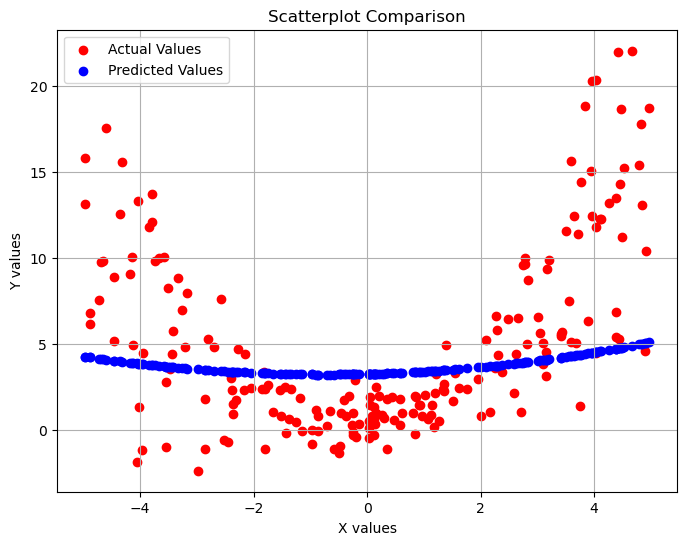

In [137]:
for alpha in alpha_choices:
    y_quad_predicted = predict_SGDReg(X_quad_train, y_quad_train, X_quad_test, alpha)
    plot_comparison([X_quad_test[:,0], y_quad_test], [X_quad_test[:,0], y_quad_predicted])


/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


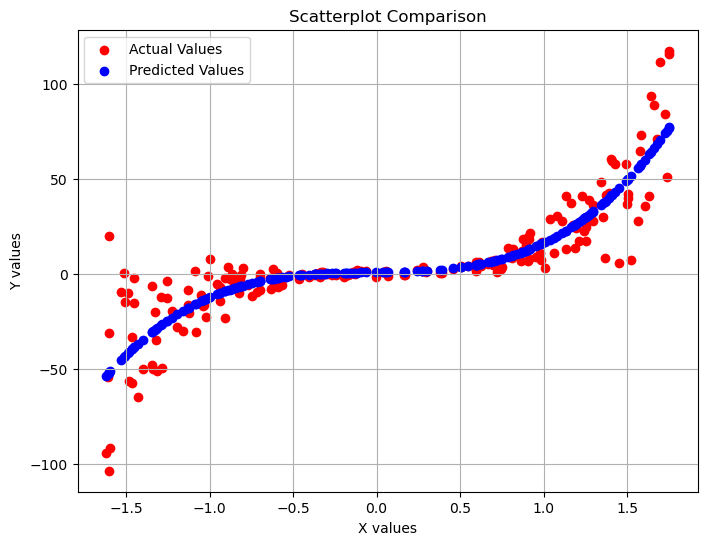

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


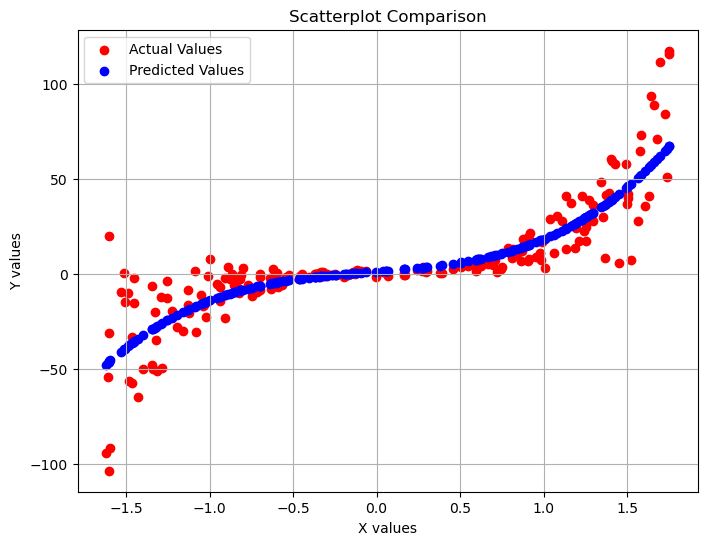

/opt/anaconda3/envs/cits5508/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


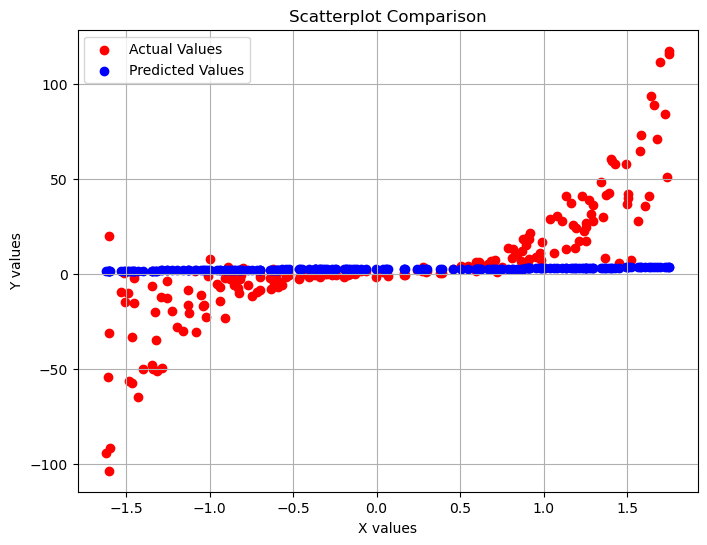

In [138]:
for alpha in alpha_choices:
    y_cubic_predicted = predict_SGDReg(X_cubic_train, y_cubic_train, X_cubic_test, alpha)
    plot_comparison([X_cubic_test[:,0], y_cubic_test], [X_cubic_test[:,0], y_cubic_predicted])
    